In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from shapely.geometry import LineString
from shapely.geometry import MultiLineString
import ast
import folium

#this is a python magic function to automatically show matplotlib plots
%matplotlib inline   

In [80]:
june_trips = pd.read_pickle('../data/june_trips.pkl')
june_trips.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDistance,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,startDateTime_clean,endDateTime_clean,duration_clean,duration_min
0,2019-06-01 00:05:46.817000,Bird,BRD3572,PoweredSPI1T,328.084000,36.164400,-86.78070,36.163600,-86.780200,"[[36.164679,-86.781089],[36.163693,-86.78011],...",2019-06-02 05:30:19.960000,2019-06-01 00:02:18.203333,2019-06-01 00:06:16.406666,0 days 00:03:58.203333,3.966667
1,2019-06-01 00:05:46.817000,Bird,BRD3571,Powered2I3MS,4921.260000,36.175300,-86.79430,36.175300,-86.794300,"[[36.175367,-86.794232],[36.175367,-86.794232]...",2019-06-02 05:30:19.927000,2019-06-01 00:02:44.803333,2019-06-01 00:07:28.286666,0 days 00:04:43.483333,4.716667
2,2019-06-01 00:09:54,Gotcha,GOT1,Powered327,12.426575,36.161501,-86.77601,36.152529,-86.783742,"[[""36.16149"",""-86.77605000000001""]]",2019-06-06 22:23:08.673000,2019-06-01 00:09:56.000000,2019-06-01 00:21:56.000000,0 days 00:12:00,12.000000
3,2019-06-01 00:10:46.957000,Bird,BRD3610,Powered8U1A6,0.000000,36.164000,-86.78070,36.163100,-86.779700,"[[36.163168,-86.779639]]",2019-06-02 05:30:20.283000,2019-06-01 00:10:31.163333,2019-06-01 00:12:02.773333,0 days 00:01:31.610000,1.516667
4,2019-06-01 00:10:46.957000,Bird,BRD3612,PoweredSPI1T,656.168000,36.165000,-86.77990,36.165900,-86.777800,"[[36.164951,-86.779836],[36.16494,-86.779456],...",2019-06-02 05:30:20.347000,2019-06-01 00:07:21.430000,2019-06-01 00:12:30.913333,0 days 00:05:09.483333,5.150000


In [3]:
def dist_in_meters(point_1, point_2):
    point_1 = [math.radians(l) for l in [point_1.y, point_1.x]]
    point_2 = [math.radians(l) for l in [point_2.y, point_2.x]]
    dist_array_m = haversine_distances([point_1, point_2])*6371000
    return dist_array_m[0][1]

# #iterate over the list of points you have, and for each pair, calculate the distance between them and make a runnning total of the distance between two points.
# #also look into converting that list of points into a line string. it should have some kind of length attribute. it's a shapely
# # geometry type. kind of like a polygon. would be 
# # a linestring can be any number of points, so 


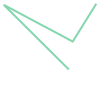

In [81]:
line_str = LineString(ast.literal_eval(june_trips.head(1)['tripRoute'][0]))
line_str

In [5]:
area_center = [36.1495185, -86.7874771]
nash_map = folium.Map(location =  area_center, zoom_start = 11)

In [6]:
my_PolyLine=folium.PolyLine(locations=ast.literal_eval(june_trips.head(1)['tripRoute'][0]),weight=5)
nash_map.add_child(my_PolyLine)
nash_map

In [82]:
for row_index, row_values in june_trips.iterrows():
    print(len(ast.literal_eval(row_values['tripRoute'])))

4
3
1
1
5
1
12
7
1
85
6
14
5
15
14
1
1
2
7
13
5
22
14
37
61
54
10
1
2
1
10
2
2
10
7
11
15
1
2
70
67
7
3
0
1
6
15
0
11
7
6
3
1
10
3
2
6
5
3
33
15
19
38
15
23
90
142
111
2
0
1
2
25
1
4
3
1
24
9
4
4
10
5
28
1
2
154
249
14
26
4
1
1
4
20
6
28
26
1
27
202
89
95
200
339
93
109
200
145
11
0
11
9
7
0
5
37
32
41
90
161
105
431
260
292
83
137
3
3
1
1
6
728
5
14
25
2
36
0
52
139
176
194
131
177
74
3
50
50
1
15
6
50
0
8
50
50
11
50
8
6
5
12
50
1
49
19
2
1
3
6
14
50
33
3
0
50
6
1
4
6
50
5
50
18
5
50
10
50
1
18
50
50
7
1
3
39
17
50
50
50
1
3
1
24
15
5
50
50
22
0
1
22
3
4
50
50
50
50
50
50
12
50
31
50
50
9
50
15
50
50
5
6
50
15
50
5
50
50
32
23
1
3
22
50
25
7
8
8
1
2
2
0
1
1
0
5
34
1
4
0
1
30
122
70
430
55
127
114
113
225
2
2
3
3
17
54
1
1
5
1
1
3
4
10
33
6
1
4
108
14
6
3
19
31
36
1
146
136
82
105
151
94
164
147
65
73
1
28
1
25
25
1
2
9
2
2
1
7
5
50
46
3
99
106
99
83
139
70
3
3
8
2
3
0
7
12
7
6
18
9
2
2
21
103
88
129
32
707
85
146
4
1
0
1
22
1
28
4
1
1
22
129
15
19
11
2
23
159
703
170
90
270
3
6
13
1


46
1
50
50
50
50
22
1
50
50
50
50
1
50
8
8
50
28
0
4
25
20
45
50
1
13
50
0
9
9
24
36
50
50
50
1
40
50
50
50
1
50
50
50
24
18
50
0
30
38
0
2
33
22
25
29
16
19
35
127
162
0
134
50
3
160
473
17
129
148
18
117
32
254
57
48
12
8
3
5
4
39
15
20
141
136
49
3
0
165
0
21
0
6
51
61
129
3
0
281
181
0
63
169
167
20
31
266
5
17
46
137
102
28
179
4
50
50
6
3
50
23
40
9
16
19
25
40
23
50
50
5
2
15
22
45
5
50
50
50
15
7
50
20
50
7
33
6
35
50
50
1
3
29
50
8
30
17
33
32
50
22
41
15
81
43
2984
79
306
3241
85
76
85
11
11
57
2
415
169
139
30
34
13
25
80
21
82
6
4
157
30
118
131
129
194
9
71
6
2
4
48
50
8
1
11
17
58
15
65
72
11
3
3
50
1
50
50
50
50
50
50
50
1
1
3
9
3
84
1
32
128
72
4
2
0
49
88
1
7
26
48
3
1
4
126
29
2
50
9
4
5
5
45
50
4
50
50
13
50
1
50
50
50
50
50
50
50
3
50
3
3
50
19
20
3
0
2
27
3
4
8
61
84
84
2
4
13
84
16
2
4
9
43
125
49
14
32
39
1
2
295
103
2
50
33
18
18
9
7
1
2
8
158
171
0
1
0
1
1
105
6
86
8
31
45
50
50
50
3
4
5
50
50
50
7
0
50
50
3
7
50
50
36
17
3
16
14
8
1
3
10
5
2
42
145
11
17
1
1
1

648
241
166
227
44
317
72
38
336
316
211
3
37
96
117
57
35
119
88
26
98
92
26
11
6
29
19
3
19
11
1
8
9
1
32
5
5
54
17
20
115
95
100
46
81
21
91
48
24
46
32
9
37
106
67
68
81
66
40
70
32
331
256
2
19
84
79
37
94
92
26
50
50
50
50
12
50
7
28
36
50
50
50
0
16
1
50
50
1
24
33
50
50
9
50
16
50
50
24
50
21
9
11
50
50
13
50
22
50
22
21
50
50
50
18
2
3
40
50
50
50
8
22
50
50
50
47
0
50
50
50
18
50
12
50
38
7
50
1
15
2
30
50
50
50
50
50
50
50
50
26
33
26
19
50
3
50
2
50
50
50
50
4
50
3
50
1
5
50
6
1
31
50
50
50
32
1
10
13
50
50
50
50
16
24
5
50
5
6
17
12
7
8
23
50
50
9
50
13
22
50
50
11
36
2
36
50
9
32
50
50
39
50
50
50
50
50
39
48
7
4
3
50
50
50
4
50
1
1
50
50
13
50
11
50
1
50
48
45
50
5
50
31
50
50
50
13
50
12
12
10
4
4
6
50
2
11
50
12
50
50
14
9
50
19
3
50
1
50
8
50
2
50
50
16
50
20
50
50
50
8
50
50
30
50
50
50
50
50
13
13
4
1
50
14
30
4
6
1
9
19
27
33
50
20
1
1
4
50
50
45
50
40
0
11
7
50
1
50
7
50
26
10
50
50
50
2
50
50
45
50
45
50
50
50
7
50
27
17
50
50
13
11
50
1
15
12
35
13
38
8
27
12
50

124
15
51
52
33
197
389
70
314
241
145
138
345
230
38
229
68
106
138
83
40
217
127
27
7
287
162
55
93
34
103
98
447
76
155
158
48
191
25
148
278
113
6
299
159
21
137
20
8
9
8
17
8
16
4
2
86
12
24
22
0
71
129
7
137
556
480
144
140
260
1067
649
459
174
251
47
179
2985
142
44
2
199
49
55
98
142
126
136
130
140
93
90
77
53
56
61
18
263
5
3
5
5
13
5
0
10
1
8
4
3
1
1
2
3
3
367
2
386
46
32
50
46
36
35
4
28
39
33
303
1401
184
592
201
95
147
1103
182
175
67
631
52
107
211
51
55
146
79
3
117
122
41
146
59
9
86
3
5
19
3
28
4
13
5
87
4
2
25
30
40
16
48
189
85
142
117
128
24
123
116
41
126
151
129
190
533
86
1
1
51
105
590
632
101
555
13
18
22
0
5
5
7
6
8
32
6
49
0
9
2
64
359
52
40
80
45
57
58
79
94
478
488
612
205
210
35
66
647
83
395
121
164
65
338
501
60
125
481
127
49
476
29
360
37
79
91
28
37
196
78
118
118
52
22
2
10
1
1
1
5
9
0
1
5
2
1
3
3
30
2
17
44
654
116
365
292
201
297
119
47
193
21
34
372
375
175
102
9
9
9
21
46
106
50
50
50
1
8
50
50
50
50
3
50
50
32
50
50
14
50
5
26
26
50
42
5
50
13


2411
224
1220
1398
977
112
105
87
76
449
48
67
2
59
2
6
5
1
3
0
18
3
27
1
3
5
1
6
1
3
3
18
1
18
3
1
3
23
75
17
50
45
44
10
105
61
214
138
154
206
116
63
39
32
56
57
66
83
45
10
9
4
8
24
3
5
6
4
10
7
1
3
2
7
3
1
35
102
4
22
43
31
29
31
30
34
45
100
195
471
55
9
67
68
29
74
224
7
85
172
72
26
47
48
193
207
148
4
3
12
8
0
8
16
10
16
1
8
7
8
6
13
6
2
20
72
164
16
57
9
184
217
145
80
83
3
3
62
123
26
29
306
174
19
83
102
36
64
44
39
108
329
45
33
211
43
178
201
68
37
5
2
11
4
26
20
8
3
2
12
8
15
7
1
1
16
4
138
24
74
25
0
29
21
124
14
1128
367
126
88
2
37
72
2
69
2
10
1
27
1
1
5
14
1
28
1
1
3
4
11
45
1
7
5
3
170
299
51
4
40
4
45
5
26
63
1405
550
261
179
305
198
66
75
332
134
195
28
40
42
4
128
104
40
18
3
4
115
133
139
68
1
19
3
1
2
20
13
22
13
1
1
2
4
5
6
9
9
1
13
3
13
11
14
3
1
9
2
131
33
120
1
76
57
31
489
417
455
33
241
376
76
46
165
79
30
30
17
3
79
7
148
281
276
143
101
2
50
50
18
4
50
50
50
15
50
50
8
50
50
12
6
8
50
50
5
50
50
18
50
8
12
50
50
50
50
1
50
50
16
50
13
50
50
20
50
14
27

644
208
108
65
4
153
101
69
37
26
28
31
1
1
1
7
13
20
7
2
6
17
5
5
2
2
1
3
3
343
66
136
159
80
135
22
66
10
64
64
16
19
68
148
11
8
2
12
3
12
15
2
5
0
5
1
3
40
7
67
57
49
22
55
48
95
115
45
184
38
373
4
4
10
42
7
27
4
6
7
9
2
5
3
2
401
19
72
56
56
646
244
597
60
88
53
211
45
86
51
6
76
254
4
1
32
2
3
2
1
29
22
10
22
3
2
3
159
17
12
1
2
4
350
137
41
39
51
56
104
558
90
231
154
382
54
36
9
89
7
2
1
2
21
11
17
124
5
21
36
76
60
0
35
257
228
78
8
45
74
2
24
2
2
8
24
1
6
1
5
24
10
25
50
218
2
3
521
8
49
59
127
3
128
37
13
138
3
26
4
19
13
16
32
8
53
7
10
6
3
6
49
55
79
8
16
160
86
63
137
198
18
128
97
5
48
3
137
5
4
4
1
7
13
10
1
1
3
14
1
62
4
191
112
110
113
114
97
44
60
60
229
96
239
267
3
4
12
3
67
2
7
68
54
8
7
9
3
8
2
193
74
509
95
35
252
32
50
14
1
50
5
8
9
50
50
50
3
9
50
24
50
50
50
50
8
50
8
29
50
50
50
5
50
4
17
50
50
3
0
35
50
50
13
50
5
12
50
50
50
50
50
1
4
50
1
50
7
50
50
50
23
16
1
50
3
50
50
21
50
50
10
50
28
4
18
9
50
50
50
50
16
50
29
50
6
50
50
10
31
16
1
19
50
50
4
50
11

214
207
210
38
84
102
372
103
369
390
188
3
2
2
6
2
9
9
4
5
11
1
13
32
36
23
65
141
119
3
601
167
174
585
37
181
191
191
186
4
6
4
8
35
2
5
4
8
1
3
1
18
37
35
39
6
7
43
176
41
10
0
109
65
1408
165
28
227
44
672
2
86
216
209
207
272
228
127
87
281
4
21
6
12
4
8
8
0
1
15
9
18
6
29
33
2
58
3
3
14
4
18
10
145
33
16
14
156
4
222
4
27
200
178
198
564
544
239
50
37
1
50
44
248
6
1
4
13
5
10
4
11
11
1
1
2
1
6
2
11
6
14
50
29
447
261
58
718
706
271
27
115
229
8
78
34
36
11
6
14
5
27
6
12
0
9
4
9
0
0
0
35
609
241
48
47
51
56
44
356
39
351
359
2
17
50
50
0
50
50
12
50
50
50
50
50
50
6
3
50
50
34
50
4
14
11
50
50
13
50
32
50
5
50
50
23
1
50
5
50
50
5
50
6
16
50
31
14
50
26
30
15
50
50
1
1
50
10
50
50
50
22
11
50
40
11
50
8
50
14
1
50
50
20
13
7
11
8
50
7
50
50
9
50
50
50
50
0
50
50
0
10
50
50
50
50
50
22
50
50
50
50
27
20
50
5
50
3
26
35
8
50
1
2
50
15
11
13
13
50
24
50
9
50
50
50
50
6
3
5
0
50
50
50
50
17
50
50
20
19
9
15
21
50
50
15
50
50
1
9
11
15
50
50
15
14
50
9
35
32
37
19
50
33
24
3
50
20
1

546
95
1
12
3
3
2
2
9
0
4
39
135
58
190
1
11
3
13
6
9
5
3
1
23
2
14
9
38
54
77
174
163
93
160
128
0
1
21
2
2
0
0
2
9
7
56
83
101
47
14
133
64
88
54
170
143
84
6
1
20
1
14
24
9
3
3
15
7
1
56
41
36
41
97
249
4
1
4
5
3
10
9
15
1
15
7
2
8
1
31
11
21
138
109
179
337
103
113
26
6
2
2
12
9
3
12
5
5
7
6
10
6
9
30
3
64
8
45
134
890
89
2
0
18
23
0
1
8
8
2
2
2
2
0
1
12
4
1
4
6
14
82
80
25
147
193
297
167
156
92
146
85
6
17
10
1
4
24
23
1
1
13
7
2
11
10
9
2
3
52
53
11
100
10
10
3
21
25
4
47
48
63
105
73
48
50
8
50
50
50
50
17
17
50
15
46
50
27
50
50
50
35
0
50
49
34
1
50
50
50
12
50
8
1
50
21
50
50
6
19
0
50
8
50
14
46
13
50
45
50
36
50
50
50
4
14
30
50
50
50
16
20
18
50
50
50
50
50
18
16
17
8
50
50
50
27
50
24
13
50
50
26
50
5
50
50
50
11
50
13
50
32
17
20
50
30
25
50
50
50
50
50
7
50
1
50
50
7
4
1
50
50
50
50
1
46
50
5
6
6
37
50
3
20
20
18
15
20
18
19
50
50
26
8
50
10
50
33
50
50
45
50
10
19
50
50
50
40
13
50
50
50
50
50
50
50
4
50
3
50
50
50
4
50
50
50
23
36
24
50
50
50
38
50
6
50
50
50
50
50
1

12
17
2
1
2
126
262
514
458
5
3
1
1
2
20
19
13
17
1
16
1
86
89
17
6
30
8
17
1
1
4
22
57
3
96
15
18
38
115
339
7
5
4
3
5
12
1
3
3
2
2
28
12
1
11
3
1
37
183
20
176
289
314
21
1292
352
314
1
1
3
4
11
0
2
1
3
5
2
89
20
64
91
83
87
75
90
11
91
1393
266
8
1
12
2
17
3
2
3
27
7
2
1
3
60
140
1
5
20
3
0
1
17
32
112
75
65
29
117
65
9
83
119
670
65
3
3
3
2
28
6
2
2
9
7
5
6
6
41
1
55
20
1
1
1
2
1
2
18
1
2
12
4
0
4
1
0
123
23
5
3
2
16
1
2
7
15
56
34
15
8
21
228
228
231
71
21
89
91
11
6
3
2
6
1
2
19
1
3
3
3
3
3
7
12
45
11
12
212
212
59
24
9
23
9
11
1
21
1
9
2
8
47
45
121
126
115
50
20
13
50
47
15
47
50
4
50
50
50
6
0
50
3
40
12
36
34
26
50
50
21
3
9
6
4
50
50
13
50
4
5
19
2
5
50
50
15
10
12
19
50
50
50
50
18
15
0
50
50
50
6
50
10
50
16
8
41
50
7
32
50
50
6
4
50
50
4
19
21
50
50
20
50
50
38
16
50
50
14
34
29
50
20
50
25
59
2
9
1
25
2
2
1
22
26
48
32
7
2
33
52
55
7
202
256
211
100
255
130
19
137
19
1
20
2
3
19
2
3
119
125
155
184
175
160
81
3
2
3
3
19
12
90
39
79
234
139
338
43
89
180
13
1
1
6
8
1
9
5


18
10
23
7
14
3
11
2
1
9
18
11
50
7
8
50
50
50
50
6
50
9
6
50
50
4
7
50
94
56
30
84
63
94
100
8
8
2
1
9
3
1
4
2
5
77
72
130
34
369
63
94
35
6
5
1
9
4
25
27
211
20
250
1094
25
208
527
72
109
70
72
204
197
42
70
85
72
12
6
27
7
2
2
4
16
24
35
430
39
49
30
57
25
153
169
3
6
0
0
0
167
69
119
179
1
11
20
5
24
6
1
3
10
19
0
19
18
93
439
150
37
444
31
28
115
131
21
148
10
0
5
2
0
12
100
21
12
153
73
43
215
174
2
28
155
58
100
15
17
3
2
1
2
3
11
6
122
241
235
133
62
113
119
3
33
93
172
230
431
17
24
2
6
23
11
10
14
23
40
49
20
54
53
232
197
297
72
300
31
31
75
2
4
2
18
12
1
3
2
4
2
1
11
6
2
3
67
33
72
61
10
54
51
93
41
153
218
59
45
13
18
2
16
0
1
4
5
2
1
51
28
47
2
676
690
459
677
33
137
2
46
43
3
3
3
3
8
441
5
4
2
31
3
16
4
1
58
32
44
8
65
112
110
45
38
2
98
61
248
40
227
125
80
6
1
3
3
20
1
13
5
5
1
1
15
21
24
294
311
70
71
152
92
50
13
50
8
16
50
15
50
13
4
7
50
2
50
13
50
50
13
17
50
50
30
50
50
50
17
5
50
50
6
16
6
22
24
50
50
0
50
50
50
44
50
50
50
11
14
39
1
50
3
50
50
36
0
1
50
50
50


51
146
16
26
12
7
7
45
4
5
34
30
26
37
244
254
250
237
129
243
241
289
41
95
84
51
283
9
3
15
17
11
1
2
14
3
3
33
7
9
12
29
33
42
153
96
49
350
47
190
50
7
50
3
50
13
50
4
1
4
3
12
50
8
16
50
13
3
50
1
3
50
50
0
4
50
1
23
50
50
50
9
5
9
50
50
6
3
8
12
50
6
50
11
50
4
50
27
1
50
14
0
50
9
50
13
50
12
7
8
23
25
50
30
3
4
12
50
19
5
50
50
8
50
50
6
50
50
10
12
50
50
1
23
50
7
29
6
3
10
50
25
20
50
50
11
1
18
3
36
50
50
19
0
50
1
16
14
50
13
50
50
50
50
50
50
17
31
50
15
4
8
1
38
50
50
48
50
50
8
50
6
50
50
50
50
2
51
23
4
1
64
3
22
19
266
49
10
61
49
62
47
101
47
17
26
47
400
464
1479
334
2355
56
395
7
34
35
27
2
130
146
172
186
123
9
12
6
0
7
1
7
92
7
1
35
210
23
253
53
38
93
39
73
178
187
42
4
177
68
8
17
35
3
18
1
3
5
1
8
15
3
2
2
5
25
106
276
266
4
189
160
48
2
16
11
13
3
22
2
9
14
48
145
276
48
43
56
13
156
159
75
39
5
1
1
12
6
3
2
0
4
47
151
101
69
61
70
47
7
1
9
2
2
2
59
38
143
139
139
62
113
46
32
1
2
4
5
2
68
6
23
197
6
2
6
2
6
5
10
53
10
49
18
10
119
21
43
116
2
3
1
1
7
20
20
9


82
3
44
135
8
2
29
16
0
1
21
34
82
31
32
44
332
4
85
5
7
3
7
458
44
65
736
79
87
46
6
27
2
5
10
2
14
8
1
7
11
157
679
49
52
106
106
83
193
1
17
7
11
5
3
56
82
2
15
95
96
3
18
11
1
4
3
6
1572
107
74
46
12
6
1
16
140
93
65
2
58
15
3
3
1
19
24
28
52
28
32
178
3
12
14
3
7
1
9
173
373
47
20
202
46
47
46
154
21
12
9
43
5
6
1
48
31
10
1
3
4
6
38
49
49
33
19
292
52
23
15
6
9
1
1
8
9
4
220
10
35
34
23
150
47
10
28
4
13
3
1
3
4
7
2
6
3
3
33
299
32
21
6
20
22
7
15
5
25
50
50
50
50
5
50
50
1
9
31
1
50
10
50
50
50
22
16
50
3
50
0
4
50
50
21
50
1
18
50
50
50
50
50
13
50
41
2
1
7
1
19
3
31
1
50
50
42
50
6
12
50
50
19
1
1
50
32
50
50
1
7
3
50
12
50
50
19
24
16
50
3
50
4
2
1
16
23
50
50
50
5
25
27
6
6
28
5
1
5
50
50
9
16
9
15
50
4
16
50
9
8
12
10
9
3
15
50
3
1
50
32
4
50
13
1
50
50
12
50
38
16
5
6
38
7
50
18
18
6
8
50
50
50
10
50
50
50
7
19
50
3
50
50
50
4
8
50
8
29
50
4
5
50
3
4
9
50
50
6
5
3
17
50
50
4
8
50
50
43
413
407
123
453
125
84
12
38
38
1
17
18
4
5
2
7
4
1
12
1
13
118
199
57
44
124
35
81
225


50
19
10
25
20
50
50
5
50
4
50
50
50
50
25
8
36
50
9
0
50
5
4
35
4
50
50
37
50
5
50
50
50
50
50
22
50
9
15
50
50
4
21
16
50
5
24
8
50
50
50
50
50
28
47
8
8
7
50
9
8
10
50
50
23
50
50
50
50
50
50
50
42
7
50
50
9
50
16
26
9
50
50
36
50
20
50
50
5
50
4
50
6
50
6
50
50
50
50
50
5
41
7
7
11
22
50
50
12
50
50
50
50
50
5
50
1
50
12
50
13
43
88
24
58
97
69
319
306
58
67
59
92
152
23
8
79
184
46
5
102
129
164
3
152
159
26
71
54
0
0
0
1
13
14
1
4
1
220
121
21
2
112
33
66
31
15
2
1
1
154
251
55
195
7
23
3
3
19
3
0
7
5
7
5
5
1
6
10
118
145
4
31
56
60
174
34
24
13
3
6
0
1
2
3
3
8
3
15
1
4
25
1
9
290
571
2
105
11
49
33
25
2
305
54
0
6
6
0
2
1
9
81
24
94
238
37
11
233
44
44
39
92
93
23
8
3
1
1
6
1
120
1434
51
67
46
8
121
0
16
0
21
3
2
12
0
2
10
20
1
30
4
0
254
215
226
211
94
23
113
36
44
3
3
27
49
4
4
20
95
1
3
22
6
3
7
25
14
2
7
3
1
373
68
103
79
138
84
157
119
122
118
63
57
6
4
5
1
6
18
24
2
4
9
21
1
145
40
121
2
53
21
97
18
9
6
22
2
3
2
8
4
4
5
4
37
29
19
6
24
51
26
19
42
4
3
2
21
3
3
1
372
87
15


50
50
50
50
50
4
50
4
50
50
50
50
50
50
50
30
50
50
31
3
50
50
5
47
6
7
35
50
50
50
10
19
50
50
6
50
10
7
14
3
4
50
50
50
50
50
50
27
50
6
50
50
15
15
3
50
17
50
50
5
50
5
6
50
50
8
13
1
50
50
50
15
50
9
5
50
50
1
27
8
50
14
23
11
7
50
10
29
50
17
6
50
12
9
50
50
50
1
6
24
5
17
50
50
50
46
6
50
50
20
12
50
50
12
19
1
6
7
6
8
3
2
76
128
101
438
1
1
1
3
222
188
197
0
10
7
34
9
1
1
2
429
2
7
1
4
8
7
4
4
5
6
506
114
2
6
6
11
22
9
3
2
3
4
3
1
1
3
1
4
7
1
13
9
4
573
220
34
1
3
8
3
10
38
1
3
20
60
51
14
5
31
1
18
10
11
323
467
16
4
3
4
4
14
1
2
12
1
3
146
146
1
1
3
4
8
31
5
9
5
11
1
2702
4
4
15
6
9
1
3
23
0
28
216
442
536
46
113
0
1
12
9
8
1
1
92
9
2
2
15
10
8
7
1
4
50
50
50
50
5
1
17
15
11
50
19
50
50
10
11
50
50
1
7
1
50
50
50
50
7
50
8
50
8
50
50
26
5
15
14
4
3
50
50
1
50
50
50
50
50
50
50
50
50
50
50
2
50
50
50
50
50
7
19
28
50
13
50
8
50
8
50
6
50
4
8
28
50
1
4
50
3
4
50
14
4
3
23
12
10
24
5
50
4
11
50
35
36
34
7
50
36
28
14
50
9
50
50
50
4
11
7
50
8
9
5
50
16
3
2
6
6
50
50
8
4
50
20
50


1494
176
23
58
147
74
5
4
5
2
137
72
181
0
3
4
3
50
6
50
50
50
20
50
50
1
50
20
50
50
7
50
50
26
3
50
13
50
50
7
50
8
3
50
13
50
50
50
50
12
8
16
12
50
50
1
17
50
50
3
34
50
50
4
8
50
7
50
7
50
9
13
50
7
1
4
9
50
7
6
8
11
35
50
24
4
18
8
50
50
46
5
34
7
4
5
19
37
50
50
11
27
7
5
50
13
0
6
18
50
11
12
5
50
1
50
28
11
50
50
10
3
12
16
2
6
50
14
50
1
7
50
0
50
12
50
50
1
7
1
50
3
0
18
50
1
11
9
29
10
50
4
50
7
50
50
11
1
6
2
2
1
13
7
28
282
244
4
40
43
18
33
28
4
6
7
143
32
3
48
110
179
75
67
147
104
15
1
7
4
12
5
3
221
60
119
655
37
7
2
30
101
38
214
210
146
65
3
73
52
162
60
68
6
62
12
8
12
34
25
13
0
67
0
62
127
238
10
1
37
120
112
53
2
86
74
11
195
83
40
85
86
23
12
3
3
46
46
46
64
15
50
8
1
50
18
50
36
50
2
50
40
50
50
17
7
9
50
7
50
50
50
1
50
50
50
5
17
50
30
1
10
5
20
7
50
4
7
8
2
50
50
50
13
18
9
5
7
0
50
50
50
5
50
50
50
5
50
50
50
50
50
50
50
50
11
9
50
50
50
1
50
50
50
4
50
50
50
7
50
50
50
50
9
33
50
7
1
4
0
50
1
1
2
50
15
21
50
11
50
7
50
3
50
50
50
50
1
41
173
104
176
67
90

12
185
7
6
2
2
3
25
5
1
12
1
43
67
99
130
30
134
1
25
14
1
8
18
4
4
2
4
12
2
9
139
150
159
256
53
239
213
222
2
83
9
62
211
114
300
105
13
6
1
2
63
88
31
46
36
17
28
81
182
77
156
14
13
2
2
3
13
3
4
30
138
147
149
76
39
83
179
94
155
1
2
10
13
5
19
94
50
3
111
7
31
33
29
42
158
430
163
191
27
4
2
28
19
1
30
4
5
1
10
9
16
143
156
69
61
51
47
3
24
2
98
31
16
15
211
142
3
13
19
2
3
18
1
14
103
9
3
12
2
121
124
85
7
19
18
50
10
50
4
50
50
10
6
50
50
16
8
1
32
16
50
50
4
50
50
8
50
50
50
16
50
50
13
11
12
7
50
8
17
4
22
50
8
5
9
3
32
50
7
50
7
50
50
50
50
50
4
6
50
3
47
6
50
6
50
50
7
3
11
50
50
50
5
6
4
5
50
1
5
1
50
6
6
50
6
3
7
50
38
50
50
50
1
50
7
50
50
7
50
24
7
7
18
10
50
6
50
18
5
50
4
5
26
50
50
26
15
50
10
26
5
50
50
18
50
1
50
50
50
50
3
50
15
50
50
50
1
10
50
50
50
6
12
1
10
50
50
6
50
6
1
50
50
7
50
50
11
3
47
27
10
14
50
14
5
10
50
50
19
50
19
50
50
50
50
41
50
2
50
5
7
50
0
9
50
50
23
5
6
40
50
50
7
50
12
50
7
50
21
50
24
50
10
27
15
20
3
23
50
50
1
50
24
10
50
50
6
50
5
50
4

4435
122
11
23
2
7
31
16
31
57
66
146
1
1
3
21
24
160
1
64
45
72
0
0
0
0
64
98
87
7
9
93
95
273
371
50
246
0
28
37
117
591
73
1
102
108
25
4
4
3
531
247
170
6
44
27
29
53
7
237
26
50
30
17
40
486
91
5
27
38
9
22
36
54
1
65
102
29
50
50
5
50
1
9
16
5
50
50
4
42
14
50
50
3
1
50
1
50
5
50
50
50
3
50
50
50
9
50
50
8
12
50
50
50
0
50
5
17
26
1
2
12
11
15
20
20
14
11
19
12
10
11
4
33
50
50
50
1
50
9
34
27
50
50
50
50
30
49
4
21
0
50
50
10
15
24
256
7
1
106
0
1
1
3
1
0
0
3
21
39
3
19
20
3
0
40
85
233
76
27
37
55
251
68
22
94
215
228
47
50
1
50
4
50
29
22
48
12
1
43
50
50
10
3
2
50
23
8
11
50
50
50
43
50
47
0
44
50
4
50
1
50
50
50
50
4
50
12
2
50
50
13
50
22
12
1
50
50
17
16
50
50
50
50
159
133
50
3
2
5
10
165
5
18
2
44
52
13
146
140
33
16
71
42
3
26
0
0
2
6
6
3
0
0
148
164
145
2
66
9
8
14
37
87
45
0
85
2
50
11
50
5
50
13
8
50
14
4
15
0
7
50
50
50
7
11
6
50
50
50
50
26
50
50
41
10
50
50
6
1
50
50
50
50
50
50
0
50
11
50
11
9
50
4
8
5
50
13
50
50
10
41
50
50
2
0
50
50
9
10
50
16
26
25
50
50
98
4

50
50
50
12
50
14
8
39
8
4
50
18
9
50
7
4
50
50
5
16
50
6
8
22
50
50
50
4
3
7
16
50
50
50
15
50
50
20
50
15
50
20
1
50
50
15
50
50
50
12
50
14
12
5
50
4
50
50
27
50
4
35
20
50
50
21
27
50
3
33
10
22
7
4
50
50
50
14
50
12
6
50
50
1
50
16
40
30
50
50
4
7
5
50
3
4
48
0
5
0
5
5
6
9
50
10
50
1
50
1
50
50
4
9
50
50
8
1
50
50
50
50
50
50
11
50
5
5
31
14
6
1
50
50
8
1
50
4
8
1
50
50
8
14
11
50
50
50
50
50
13
5
50
4
10
7
50
50
7
50
1
14
50
50
50
10
50
50
9
50
15
50
50
50
50
50
9
50
24
50
3
8
17
1
50
24
9
50
50
50
0
20
50
12
15
50
50
21
50
19
50
0
50
50
50
0
10
6
8
50
11
2
50
12
50
50
12
50
3
10
50
6
50
50
50
50
14
50
30
50
50
10
6
6
50
16
10
50
5
50
10
50
50
50
50
3
6
6
10
5
21
50
50
50
1
9
50
2
50
50
7
50
6
50
6
17
18
14
27
14
3
1
6
24
50
46
10
50
50
50
14
50
2
50
16
3
0
50
50
50
50
50
50
50
7
5
50
3
50
11
1
50
50
12
50
50
50
5
50
50
50
15
50
9
6
50
1
50
38
1
23
4
50
13
3
50
49
5
16
52
42
42
80
72
44
338
231
203
203
40
6
7
16
1
1
3
14
1
5
1
4
3
10
60
196
2
173
47
44
0
0
133
120
1
17
0
25
17
1


24
12
15
5
6
9
3
6
11
27
0
3
3
1
4
8
27
69
276
477
76
117
103
78
130
89
1
5
0
2
7
8
11
11
11
1
11
4
29
3
1
5
2
93
294
110
159
50
168
184
3
1
4
1
14
3
12
2
2
240
21
82
85
87
3
46
30
381
7
19
9
3
3
12
9
21
1
5
10
3
61
24
192
80
137
121
133
293
102
125
212
1
17
1
5
2
2
1
2
11
11
1
12
0
2
1
43
48
48
28
57
59
53
28
3
6
1
4
33
8
4
1
1
8
8
5
9
88
113
118
36
98
108
37
54
76
64
78
84
165
344
513
13
1
3
8
102
88
55
47
52
52
3
36
33
30
90
193
5
4
7
1
1
2
7
147
45
2
175
172
47
434
65
8
0
20
421
149
60
143
149
45
7
11
1
4
4
17
18
15
2
2
28
2
4
5
7
17
10
4
4
144
144
3
46
41
78
147
269
80
307
3
12
29
2
5
2
5
14
63
13
16
7
5
10
3
7
13
16
18
50
50
50
22
50
50
50
50
50
50
50
50
50
50
4
8
33
5
0
24
8
50
42
12
50
50
50
50
4
50
50
50
50
16
50
50
6
1
50
12
50
12
50
21
50
50
50
6
19
50
50
16
4
6
8
11
50
27
30
9
50
1
6
22
47
48
8
12
14
18
7
7
50
50
50
50
50
50
50
18
31
50
15
28
29
50
50
50
50
27
21
50
50
1
50
9
12
12
50
5
50
50
50
50
50
50
11
1
6
1
7
6
3
9
50
50
50
50
50
50
12
6
50
9
12
50
50
50
4
6
24
50
4
5

362
357
84
1
2
3
3
2
1
1
8
3
1
9
6
4
5
145
42
167
7
21
7
7
4
14
4
17
199
179
248
181
156
205
189
609
225
156
235
24
3
8
25
8
7
21
14
4
3
11
18
2
4
75
8
6
293
352
10
23
6
4
22
3
7
11
4
4
3
8
8
4
9
7
4
20
2
331
1
1
7
7
73
79
74
74
187
37
12
1
3
5
7
5
1
4
24
75
54
2
6
3
3
19
6
3
5
2
13
9
5
27
26
270
304
83
10
1
1
7
1
10
11
7
3
0
10
2
1
23
22
73
69
14
14
46
262
73
4
4
7
10
5
2
2
10
5
8
1
7
6
15
1
2
23
90
97
54
68
15
166
242
8
7
9
5
2
2
2
1
10
3
7
1
3
15
1
16
36
14
97
156
166
297
317
260
85
4
7
13
1
1
1
3
7
20
5
1
2
4
2
80
53
100
50
3
11
20
50
50
50
11
50
50
15
22
50
17
14
14
12
12
50
50
7
50
12
50
50
50
39
50
50
50
9
50
50
50
50
50
50
50
50
50
50
15
35
1
50
50
7
50
1
3
50
50
50
44
5
50
50
4
50
1
50
50
26
50
31
1
2
50
4
50
0
5
2
50
50
50
50
50
28
50
50
45
26
14
15
15
50
50
50
9
4
16
5
50
8
9
50
50
6
50
15
3
8
50
25
50
27
50
50
50
8
50
50
50
50
50
50
10
13
10
50
50
7
12
11
8
17
5
50
4
6
10
7
50
50
50
50
50
50
5
50
50
50
33
7
50
17
10
7
10
50
13
50
10
7
13
7
50
50
3
50
50
16
5
12
50
50
50
18


12
50
50
50
14
1
38
50
1
50
50
18
50
43
50
10
2
4
0
5
50
50
50
35
50
9
14
50
50
1
11
50
46
0
20
11
50
50
31
50
50
41
22
34
43
50
50
44
9
40
39
33
9
50
50
50
50
50
45
10
50
44
1
22
26
2
50
15
50
50
50
50
50
50
50
8
50
9
50
10
50
15
50
50
50
50
50
3
8
4
50
13
50
50
50
50
21
22
20
50
10
50
50
50
9
40
50
20
50
20
5
24
50
3
50
3
12
3
50
25
50
50
7
15
50
50
0
50
13
50
26
9
50
1
32
50
50
6
5
50
9
11
50
50
9
2
1
50
10
8
50
20
50
30
50
50
12
13
50
43
6
50
6
14
7
30
16
16
12
8
9
18
50
50
26
25
24
15
19
50
8
50
50
9
50
6
50
50
50
50
15
14
15
14
27
37
50
8
8
50
50
10
0
42
50
50
3
50
12
50
50
28
49
14
38
3
50
14
2
50
50
50
35
50
49
39
42
50
0
6
50
50
50
7
50
34
50
50
50
50
4
23
50
20
50
50
24
50
5
0
5
36
15
19
20
10
50
19
20
50
50
1
50
1
1
50
50
50
3
6
7
50
50
50
50
50
50
43
8
4
50
50
6
5
45
12
50
13
9
6
5
50
28
27
50
19
10
50
16
14
3
35
30
50
9
5
27
5
47
38
50
50
12
49
9
38
30
50
13
50
10
50
33
12
42
44
50
11
50
40
9
50
50
50
45
29
50
0
27
43
29
1
8
50
50
24
50
29
7
50
32
50
37
50
3
50
43
34
94
2


32
9
21
76
129
3
21
75
7
83
72
12
30
130
9
126
7
4
86
4
36
4
13
86
33
254
115
179
241
37
169
116
496
384
162
114
99
381
193
49
252
11
0
3
19
3
2
5
8
2
7
3
26
16
19
26
7
1
6
13
15
19
1
5
0
3
24
19
21
2
12
0
19
37
3
12
12
34
1
2
1
4
1
14
15
1
1
7
78
116
65
3
2
2
74
72
70
73
40
39
5
221
26
25
33
61
2
88
94
49
36
43
0
45
179
202
6
6
6
32
54
19
19
183
1406
1479
292
140
1418
70
704
10
2
7
3
1
7
7
8
19
3
4
2
0
13
17
3
3
4
1
2
14
2
18
2
3
13
7
0
6
5
1
13
1
3
1
0
12
1
26
1
32
131
37
133
133
137
265
229
54
156
7
7
7
46
260
291
261
27
296
48
12
47
9
285
189
207
126
488
1158
198
185
142
1
3
21
14
6
4
5
3
2
17
25
1
3
8
3
1
4
2
5
1
2
3
3
4
3
3
1
6
32
0
42
9
14
19
1
66
97
12
32
26
72
79
24
53
56
135
38
92
846
153
900
119
496
210
100
162
898
310
266
163
2
13
4
11
7
2
0
14
3
8
3
13
5
5
5
2
4
2
18
2
9
8
2
1
22
16
39
14
1
15
29
5
21
2
17
4
6
0
42
0
26
3
93
89
74
35
57
121
121
168
293
96
77
66
41
19
25
45
9
59
22
120
53
2
87
302
156
355
307
355
164
62
223
305
403
382
29
2
2
12
25
9
6
2
13
16
10
5
6
23
11


50
50
50
50
50
50
4
5
50
10
15
50
50
50
7
50
50
3
50
50
50
1
50
50
50
32
41
0
50
50
1
3
9
50
1
12
50
17
16
3
50
50
50
37
50
50
50
50
12
50
12
32
11
32
33
12
19
50
50
29
50
50
6
50
29
50
15
50
50
50
50
50
50
5
1
50
50
50
50
50
22
23
0
50
50
36
50
4
50
50
16
1
50
9
50
50
11
50
50
35
7
2
50
50
50
8
50
50
50
50
14
50
6
29
50
3
50
50
50
12
15
10
1
50
1
50
9
50
4
3
50
5
32
50
17
50
3
3
50
50
3
8
1
50
4
26
9
15
50
3
50
6
1
24
22
1
17
50
50
11
50
25
9
50
24
50
50
31
3
50
50
19
11
31
28
0
50
25
50
50
50
14
25
50
29
50
1
1
50
50
1
0
54
753
267
133
96
40
135
2
13
6
7
28
14
1
11
8
8
8
7
1
11
0
1
4
4
3
31
31
26
26
12
104
106
48
2
422
140
43
132
169
105
31
106
59
36
24
15
1
7
6
1
8
8
6
12
6
7
17
1
4
13
0
10
429
38
116
43
17
115
97
93
96
89
13
207
159
102
91
15
18
15
1
35
5
5
44
8
2
53
24
3
5
7
2
2
69
55
50
380
2
118
68
91
136
66
82
2
83
5
1
22
1
11
9
9
41
5
1
32
6
34
9
1
12
9
4
3
2
318
2
3
72
132
20
97
0
35
171
314
624
35
58
131
1
4
1
4
2
64
1
1
14
0
11
2
34
1
11
3
6
15
3
35
65
53
2
36
32
37
172
896

3212
2
23
75
55
75
79
34
25
4
14
93
89
50
50
8
6
7
50
5
18
23
50
6
50
0
5
17
0
50
50
26
32
50
0
50
50
32
11
0
50
26
4
1
50
50
50
3
50
11
7
36
18
5
50
24
50
50
18
50
50
1
6
12
6
50
50
50
15
15
50
11
15
5
50
50
13
50
7
4
7
36
50
8
20
25
50
8
18
50
50
50
9
11
1
50
5
50
0
17
8
3
3
116
35
6
131
374
88
17
44
7
80
456
152
1
1
26
3
55
4
164
20
34
28
0
3
138
198
21
90
518
23
289
117
45
34
36
3
2
60
59
128
85
102
129
6
134
151
41
2
61
59
65
70
304
98
648
151
69
119
47
131
6
36
30
110
65
16
31
20
25
35
82
10
110
593
17
163
86
122
123
509
630
16
48
6
40
34
70
30
117
12
24
62
3
100
29
19
6
72
45
39
74
68
101
68
2
532
2
44
52
2
119
2
12
521
2
35
206
43
65
70
138
279
63
16
6
6
48
353
233
184
4
4
93
2
67
79
87
88
5
88
87
104
44
31
106
1
9
42
0
12
72
50
17
50
50
0
50
50
50
8
32
50
50
50
50
3
50
50
50
6
23
10
43
50
8
12
50
50
38
21
13
50
50
10
13
50
50
13
50
50
25
50
12
24
6
4
50
50
50
50
50
43
22
8
30
43
21
50
3
0
17
50
50
50
6
3
50
12
2
2
35
60
125
2
2
23
44
6
38
62
44
29
184
78
19
49
11
62
62
6
61
27

35
4
3
3
283
123
364
3
177
101
3
26
85
46
125
239
239
231
284
533
408
10
7
8
14
5
0
12
10
8
2
3
2
16
19
3
2
8
2
10
2
6
85
89
12
9
60
108
73
98
102
90
94
178
44
172
97
10
73
66
91
431
33
55
110
118
438
158
182
260
307
77
60
40
42
65
273
192
582
13
18
2
19
4
11
6
9
2
8
18
8
5
0
13
6
2
9
23
6
28
34
8
2
3
23
1
16
9
37
4
11
3
18
9
5
2
41
5
161
151
4
136
186
38
41
34
84
92
2
3
26
116
98
72
83
664
181
124
90
82
470
156
52
48
92
168
1
11
2
4
3
0
7
1
15
34
19
13
11
10
4
2
19
9
1
16
2
7
1
8
4
171
68
4
4
100
2
80
237
179
69
156
103
121
162
593
240
126
177
212
188
1
6
4
3
0
1
3
0
12
1
12
19
2
2
1
7
1
16
10
43
175
2
73
188
82
36
19
65
178
191
246
19
93
187
418
62
3
8
20
2
18
17
7
2
0
7
2
13
31
1
1
5
11
2
5
2
1
13
2
1
17
7
148
84
237
262
128
197
261
199
126
89
26
13
696
835
181
112
33
356
23
6
7
0
20
6
2
4
2
0
4
9
1
10
0
2
2
30
1
2
7
2
11
8
4
2
3
0
10
6
77
37
58
73
4
121
10
146
95
104
106
63
3
55
8
12
133
159
27
23
370
95
223
76
64
37
174
3
2
1
9
3
1
4
2
10
2
2
1
5
1
11
1
7
14
8
2
10
1
15
78
41
34
1

50
50
50
50
50
50
21
6
50
17
50
10
6
50
50
50
50
50
0
50
50
9
26
50
50
23
50
8
7
7
50
50
50
50
50
50
1
5
5
6
50
50
12
50
4
15
50
5
50
50
50
15
50
45
50
50
9
41
42
50
4
50
5
32
50
11
4
7
50
19
14
30
6
3
50
50
4
50
50
50
50
50
50
50
50
10
19
50
50
50
9
15
50
50
13
50
50
50
41
50
46
50
50
50
13
50
8
50
50
6
50
52
60
36
33
96
15
31
14
330
941
905
43
2
1
6
42
1
1
15
1
5
3
2
0
16
3
3
1
1
3
1
1
8
0
4
30
30
3
33
2
81
269
353
233
286
393
79
9
1
4
2
8
1
7
4
5
6
2
3
11
1
1
5
23
1
2
28
6
0
5
1
5
1
1
13
0
3
6
1
24
12
6
0
88
50
150
502
32
67
3
106
13
1118
213
87
208
57
366
137
109
170
219
1
12
1
3
8
18
1
4
1
3
7
66
138
51
152
101
94
16
8
881
2894
101
29
209
920
108
97
117
9
21
4
14
13
27
1
4
1
22
0
3
1
5
3
0
15
35
66
310
746
65
243
121
15
155
119
111
67
183
14
84
106
94
83
97
104
177
76
139
7
13
5
8
3
1
10
5
2
1
22
2
2
1
2
4
2
1
6
5
10
9
4
16
7
61
124
112
95
112
11
844
175
1133
48
157
22
11
2
13
21
1
3
5
7
1
7
2
2
39
149
57
104
122
5
120
25
44
112
165
112
156
133
224
122
136
78
114
63
10
12
41
30
0


231
8683
4750
284
325
264
273
55
289
5755
7074
3487
2
9275
4355
2
2
50
2
1
50
50
11
50
14
75
3
4
117
155
6
1
2
233
4
43
50
50
50
1
10
50
2
1
19
27
11
5
81
6
2
58
7
88
28
4
10
28
50
50
50
46
2
5
1
3
5
12
7
15
70
64
67
23
3
51
2
2
4
5
17
70
1
6
6
30
33
4
1
2
13
52
12
5
41
77
46
4
100
1
4
4
1
3
1
50
50
0
0
50
50
50
50
50
3
50
0
3
4
5
18
40
6
50
50
50
1
50
15
50
7
38
50
31
67
72
12
14
1
5
2
1
14
3
62
2
2
2
3
7
3
3
1
3
1
0
5
11
10
4
2
7
11
20
33
2
2
100
47
46
4
4
17
76
110
168
4
1
3
3
1
89
84
47
1
7
1
3
71
34
1
9
1
45
89
15
74
1
5
5
1
4
7
11
50
50
0
50
50
50
50
3
7
7
6
3
8
50
50
50
12
5
50
1
6
50
0
6
3
3
14
5
8
7
50
50
3
50
4
8
50
15
7
8
50
50
4
6
47
1
50
17
55
85
5
2
11
21
167
242
4
3
55
62
70
37
70
34
3
14
1
74
19
11
13
4
4
115
2
13
3
11
38
39
204
108
3
19
1
9
118
87
45
66
166
220
245
18
2
3
3
4
3
16
7
2
10
1
4
8
48
226
115
77
36
68
46
7
2
8
0
4
60
72
66
108
29
6
4
5
1
9
8
6
82
33
8
50
38
5
5
4
1
7
50
1
10
1
0
50
50
6
50
8
13
50
3
12
6
3
50
4
3
50
1
50
50
13
7
5
50
3
2
50
3
50
9
50
1
30
5

14
12
14
2
9
3
55
42
18
22
140
151
15
1
1
11
7
9
97
68
50
4
145
154
150
142
86
136
137
41
28
234
110
5
1
4
1
20
45
98
27
9
137
137
1
3
13
5
3
1
22
2
7
18
4
4
4
11
2
118
27
26
91
256
181
41
41
43
43
4
9
10
2
18
147
91
76
83
367
169
93
134
1
7
17
1
1
20
19
13
10
7
1
1
25
2
140
126
23
303
36
1074
96
36
263
153
243
4
32
3
3
5
6
7
8
8
1
6
1
12
50
4
26
41
14
50
50
50
3
50
9
8
50
50
39
2
29
50
35
50
50
5
50
50
11
50
50
10
27
50
50
50
50
7
50
37
50
34
24
50
1
6
50
0
50
11
50
24
7
27
50
50
7
18
50
17
8
50
50
45
0
50
11
37
0
50
14
4
10
50
50
50
22
1
8
6
50
16
41
1
5
1
0
17
24
16
50
50
7
10
16
3
8
8
16
50
1
50
12
13
50
22
36
22
50
50
17
32
50
22
50
50
22
22
50
50
29
50
50
50
50
48
26
10
2
50
50
27
8
6
50
10
41
52
2
10
310
327
82
25
1
6
9
11
6
3
8
17
6
49
1
1
5
4
73
77
40
7
114
202
99
34
233
7
1
1
7
2
1
3
1
2
11
2
2
62
118
2
16
86
92
137
146
106
22
1
1
2
4
2
7
25
1
1
5
2
8
3
54
58
31
233
45
2
1
10
94
83
2
2
4
100
3
2
116
71
116
261
128
7
4
320
1020
1
0
2
4
2
4
15
5
0
4
1
7
1
394
158
88
49
41
119
1

50
50
11
50
4
50
28
50
50
50
50
50
36
9
50
50
50
50
50
50
50
1
50
50
29
50
50
8
4
12
50
35
50
11
50
16
5
0
29
50
50
50
10
16
10
50
50
6
20
1
25
50
50
23
50
35
50
0
50
6
12
50
4
50
2
1
3
1
23
6
12
2
1
33
29
57
82
63
8
23
2
1
2
61
30
26
160
140
23
28
1
4
27
7
35
111
111
68
54
48
218
2
2
9
32
10
15
18
1
1
17
33
7
1
45
89
20
95
45
126
65
28
7
31
207
541
5
22
1
2
8
8
27
11
2
4
1
1
1
4
4
1
2
197
212
16
25
30
0
0
17
14
73
71
150
86
5
5
5
6
30
1
19
3
2
1
2
3
7
20
69
38
46
282
1
8
5
3
11
2
7
2
8
7
1
7
3
43
29
103
85
160
4
6
1
1
2
7
4
39
68
11
60
29
1
2
0
5
3
3
3
235
197
192
0
0
79
76
19
1
5
3
2
6
2
35
53
4
2
3
69
38
36
17
1
3
9
39
3
0
1
344
32
2
1
5
2
6
2
119
187
22
447
403
181
33
50
50
50
11
50
2
50
50
50
50
4
15
16
35
50
50
13
18
27
4
10
50
7
21
50
8
6
50
5
50
1
50
50
50
50
50
1
20
50
1
50
4
9
4
5
50
50
50
14
50
1
11
3
21
50
4
4
1
50
50
50
50
19
6
4
11
50
50
5
50
50
50
1
10
50
50
50
3
50
50
50
50
16
50
27
5
6
2
18
50
50
50
1
5
50
9
14
9
50
14
50
50
50
22
3
50
50
50
11
50
5
13
17
17
49
2
2
15


68
5
89
162
193
76
60
83
30
139
18
9
12
11
51
245
273
20
140
50
101
39
86
29
33
43
16
228
181
43
219
128
34
54
151
37
118
139
9
39
148
44
10
91
171
122
8
48
255
67
30
98
111
38
4
279
55
42
154
45
488
5
294
242
80
94
55
126
236
192
106
15
25
24
41
155
765
206
62
22
34
37
6
17
63
28
28
105
60
78
85
208
58
217
10
1
55
74
188
50
209
77
130
129
27
18
74
131
84
5
79
32
291
67
447
65
70
288
33
62
50
32
264
17
52
13
176
109
115
80
30
232
128
29
16
22
17
21
23
7
269
370
234
277
251
222
350
171
136
26
47
3
141
5
142
2
71
45
63
90
68
39
148
101
2
136
186
0
4
2
3
2
113
113
21
69
289
44
112
11
36
41
72
69
30
203
200
28
2
50
50
18
50
5
7
50
50
13
50
9
50
50
1
50
12
50
50
4
50
3
50
10
50
14
50
26
10
50
24
50
33
7
50
50
50
27
50
8
50
8
6
26
4
25
28
3
3
21
50
50
50
32
21
50
20
41
43
50
32
17
32
7
20
7
50
5
50
12
50
5
50
50
50
8
6
0
50
50
32
5
50
50
50
17
22
40
50
50
50
24
50
17
4
50
1
0
3
50
1
50
50
6
50
30
6
32
4
50
50
50
50
50
4
50
50
0
2
18
23
50
47
1
50
50
50
50
50
8
1
45
50
4
50
15
14
50
4
11
3
11

252
123
74
26
40
106
12
37
132
51
53
110
211
2
8
54
53
72
3
55
2
86
26
124
84
1
65
0
695
116
288
9
182
1
51
569
126
21
47
7
116
23
278
27
143
61
77
39
130
47
70
2
110
101
2
88
2
88
155
245
62
31
163
127
36
156
293
67
298
119
42
58
41
88
67
105
0
21
132
0
0
53
10
12
5
180
202
34
54
110
22
225
67
38
49
44
135
68
124
66
40
16
53
15
2
2
37
26
50
1
1
50
9
50
2
50
13
9
50
2
50
50
3
50
50
1
1
4
6
13
5
50
14
24
4
24
50
7
50
19
34
22
50
9
17
50
13
13
18
50
50
50
50
50
7
31
12
50
5
0
50
50
17
35
14
50
50
2
50
0
4
50
5
9
50
50
8
50
4
39
37
1
7
50
50
16
1
4
39
8
4
50
50
27
50
5
14
590
695
143
271
400
117
14
9
28
112
102
165
31
199
4
45
63
8
5
6
19
1
24
5
86
19
109
11
13
0
246
716
47
145
714
92
41
105
40
47
7
315
81
6
125
31
0
0
26
105
78
96
175
46
231
4
330
53
111
1
113
1
6
131
88
109
1
38
113
24
58
56
81
111
25
22
25
26
24
21
63
148
451
55
167
20
22
140
44
72
1
25
5
10
3
3
76
3
125
38
0
91
0
99
2
312
325
96
5
2
54
32
66
54
267
276
259
78
110
41
48
10
6
3
389
8
84
176
144
11
158
97
422
2
36
188
22

90
192
55
98
440
33
472
201
8
128
124
9
51
81
73
23
6
11
50
369
107
105
327
33
1
32
52
4
13
20
45
13
582
33
33
7
371
44
171
20
134
5
19
0
35
45
42
6
50
9
50
50
6
5
50
34
50
50
6
50
14
48
50
50
50
50
50
50
50
1
17
50
38
5
5
14
27
50
29
50
50
50
1
50
50
7
6
11
5
0
50
5
50
8
50
16
10
3
6
4
50
43
44
50
6
50
8
8
50
1
50
50
1
50
9
4
50
50
0
5
50
50
50
10
20
50
16
50
50
50
17
5
50
50
50
50
37
50
50
8
50
50
7
9
50
35
1
50
50
15
15
50
50
8
22
38
3
50
50
50
5
50
3
50
50
50
50
50
9
13
50
11
50
18
50
50
50
0
50
50
50
3
8
50
35
78
70
7
222
458
5
458
36
12
158
9
15
538
1
110
203
99
35
18
39
74
225
226
97
112
3
168
46
21
54
70
212
18
9
38
13
3
469
1
78
187
90
41
45
1
93
61
27
13
59
70
11
8
42
10
83
224
54
94
2
57
102
84
8
321
1
85
111
2
4
70
8
110
3
5
34
24
47
14
17
0
14
1678
199
271
105
75
40
101
76
83
9
130
132
23
90
92
92
22
21
105
84
85
88
2
103
249
17
7
19
0
22
34
570
2
105
8
65
110
13
88
37
3
153
22
94
21
64
76
176
170
115
37
183
48
3
254
41
1
143
14
65
18
90
83
484
99
79
27
59
88
95
242
152
19

1013
45
86
88
255
47
165
269
7
175
3
85
79
1410
42
8
27
144
114
39
2
72
46
240
220
425
356
260
97
94
110
25
299
15
32
24
350
152
3
49
13
43
196
197
245
43
38
176
384
96
3
3
6
351
58
76
130
37
37
78
96
168
222
81
135
11
26
73
294
49
69
286
158
156
126
143
46
64
33
94
1
59
1
105
2
219
24
81
44
181
288
50
50
50
50
50
50
10
50
50
50
3
50
14
50
14
12
15
5
50
49
50
50
50
3
50
12
50
8
11
6
50
45
50
50
50
4
17
15
9
19
45
50
10
16
8
8
41
50
5
50
32
50
35
4
50
50
4
3
50
50
26
50
50
50
50
50
50
7
3
50
50
50
10
5
50
11
8
50
3
8
6
50
50
44
3
3
36
4
7
50
10
50
50
50
50
50
50
19
50
50
6
50
50
9
50
8
0
14
50
16
50
7
4
21
8
270
2
2
0
0
77
62
389
261
40
22
132
27
26
8
14
108
151
68
52
74
92
5
53
113
45
126
293
76
72
276
76
78
29
9
8
6
33
18
9
10
17
7
12
7
2
7
32
14
26
14
16
3
25
5
6
16
9
24
15
78
63
39
44
17
74
416
64
71
78
3
138
2
123
45
32
1
45
150
152
4
30
40
255
158
159
52
379
82
68
121
2
40
398
155
110
239
392
54
129
41
298
309
37
8
80
32
78
107
35
4
4
5
2
157
81
43
113
33
248
209
306
247
115
242
1

KeyboardInterrupt: 

In [79]:
for row_index, row_values in june_trips.head(100).iterrows():
    line_str = LineString(ast.literal_eval(row_values['tripRoute']))
    print(line_str)

LINESTRING (36.151951 -86.784316, 36.151951 -86.784316, 36.151996 -86.784403, 36.152008 -86.78443799999999, 36.152013 -86.784468, 36.152221 -86.784441, 36.152016 -86.784485, 36.152017 -86.784499, 36.152016 -86.784509, 36.152016 -86.784509, 36.152016 -86.784515, 36.152525 -86.78438300000001, 36.152016 -86.78451800000001, 36.152029 -86.78451800000001, 36.152095 -86.78454000000001, 36.152553 -86.784835, 36.152805 -86.784987, 36.152969 -86.78507500000001, 36.153002 -86.785099, 36.153385 -86.785343, 36.153385 -86.785343)
LINESTRING (36.15492 -86.77737, 25.77289 -80.19096, 25.77289 -80.19096, 25.77274 -80.19092000000001, 25.77274 -80.19092000000001, 25.7727 -80.19091)
LINESTRING (24.44891 -87.20636, 24.44891 -87.20636, 24.44891 -87.20636, 24.44891 -87.20636, 24.44891 -87.20636, 24.44891 -87.20636, 24.44891 -87.20636, 36.16233 -86.77832000000001, 36.16202 -86.77923000000001)
LINESTRING (33.35852 -84.91592, 33.35852 -84.91592, 33.35852 -84.91592, 33.35852 -84.91592, 36.18823 -86.79465999999999

LINESTRING (36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839 -86.76854, 36.15839

TypeError: must be real number, not str

In [37]:
ast.literal_eval?

In [83]:
test = ast.literal_eval(june.loc[0, 'tripRoute'])

In [84]:
test

[[36.164679, -86.781089],
 [36.163693, -86.78011],
 [36.164738, -86.780666],
 [36.165095, -86.780093]]

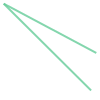

In [85]:
MultiLineString([test[0:2], test[1:3]])

In [86]:
[test[0:2], test[1:3]]

[[[36.164679, -86.781089], [36.163693, -86.78011]],
 [[36.163693, -86.78011], [36.164738, -86.780666]]]

In [74]:
lines = []

for row_index, row_values in june.head().iterrows():
    line_str = LineString(ast.literal_eval(row_values['tripRoute']))
    print(line_str)

LINESTRING (36.151951 -86.784316, 36.151951 -86.784316, 36.151996 -86.784403, 36.152008 -86.78443799999999, 36.152013 -86.784468, 36.152221 -86.784441, 36.152016 -86.784485, 36.152017 -86.784499, 36.152016 -86.784509, 36.152016 -86.784509, 36.152016 -86.784515, 36.152525 -86.78438300000001, 36.152016 -86.78451800000001, 36.152029 -86.78451800000001, 36.152095 -86.78454000000001, 36.152553 -86.784835, 36.152805 -86.784987, 36.152969 -86.78507500000001, 36.153002 -86.785099, 36.153385 -86.785343, 36.153385 -86.785343)
LINESTRING (36.15492 -86.77737, 25.77289 -80.19096, 25.77289 -80.19096, 25.77274 -80.19092000000001, 25.77274 -80.19092000000001, 25.7727 -80.19091)
LINESTRING (24.44891 -87.20636, 24.44891 -87.20636, 24.44891 -87.20636, 24.44891 -87.20636, 24.44891 -87.20636, 24.44891 -87.20636, 24.44891 -87.20636, 36.16233 -86.77832000000001, 36.16202 -86.77923000000001)
LINESTRING (33.35852 -84.91592, 33.35852 -84.91592, 33.35852 -84.91592, 33.35852 -84.91592, 36.18823 -86.79465999999999

In [91]:
a = []
for row_index, row_value in june_trips.iterrows():
    routelist = ast.literal_eval(june_trips.loc[row_index,'tripRoute'])
    if len(routelist) > 2:
        if isinstance(routelist[0][0], float): 
            a.append(LineString(routelist).length)
        else:
            a.append(LineString(np.array(routelist,dtype=np.float32)).length)
    else:
        a.append(0)
june_trips['routeDistance']= a
#print(str(row_value['tripDistance'])+' | '+ str(test))
#np.array(ast.literal_eval(july_trips.loc[56,'tripRoute']),dtype=np.float32)


In [92]:
june_trips.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDistance,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,startDateTime_clean,endDateTime_clean,duration_clean,duration_min,routeDistance
0,2019-06-01 00:05:46.817000,Bird,BRD3572,PoweredSPI1T,328.084000,36.164400,-86.78070,36.163600,-86.780200,"[[36.164679,-86.781089],[36.163693,-86.78011],...",2019-06-02 05:30:19.960000,2019-06-01 00:02:18.203333,2019-06-01 00:06:16.406666,0 days 00:03:58.203333,3.966667,0.003248
1,2019-06-01 00:05:46.817000,Bird,BRD3571,Powered2I3MS,4921.260000,36.175300,-86.79430,36.175300,-86.794300,"[[36.175367,-86.794232],[36.175367,-86.794232]...",2019-06-02 05:30:19.927000,2019-06-01 00:02:44.803333,2019-06-01 00:07:28.286666,0 days 00:04:43.483333,4.716667,0.000000
2,2019-06-01 00:09:54,Gotcha,GOT1,Powered327,12.426575,36.161501,-86.77601,36.152529,-86.783742,"[[""36.16149"",""-86.77605000000001""]]",2019-06-06 22:23:08.673000,2019-06-01 00:09:56.000000,2019-06-01 00:21:56.000000,0 days 00:12:00,12.000000,0.000000
3,2019-06-01 00:10:46.957000,Bird,BRD3610,Powered8U1A6,0.000000,36.164000,-86.78070,36.163100,-86.779700,"[[36.163168,-86.779639]]",2019-06-02 05:30:20.283000,2019-06-01 00:10:31.163333,2019-06-01 00:12:02.773333,0 days 00:01:31.610000,1.516667,0.000000
4,2019-06-01 00:10:46.957000,Bird,BRD3612,PoweredSPI1T,656.168000,36.165000,-86.77990,36.165900,-86.777800,"[[36.164951,-86.779836],[36.16494,-86.779456],...",2019-06-02 05:30:20.347000,2019-06-01 00:07:21.430000,2019-06-01 00:12:30.913333,0 days 00:05:09.483333,5.150000,0.008584


In [113]:
june_trips = june_trips.sort_values('startDateTime_clean')

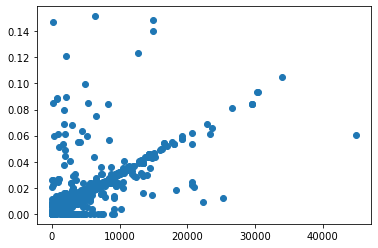

In [117]:
plt.scatter('tripDistance', 'routeDistance', data = june_trips.head(1000))

In [136]:
sub = june_trips.loc[june_trips['routeDistance'] < .5]
sub = sub.loc[sub['tripDistance'] < 100000]
sub = sub.loc[sub['tripDistance'] > 0]

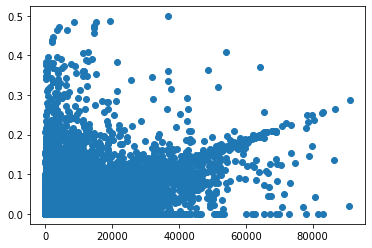

In [137]:
plt.scatter('tripDistance', 'routeDistance', data = sub)

In [138]:
plt.scatter?